# Histogram Charts with Matplotlib

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Setting seaborn as default style even if use only matplotlib
sns.set()

## Example 1: Simple Histogram

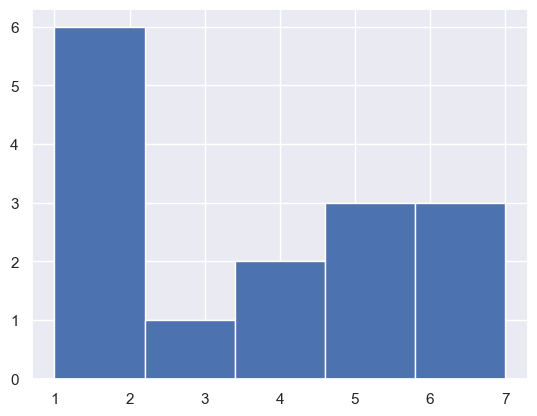

In [6]:
x = [1,2,5,1,2,3,5,6,7,4,2,2,4,5,6]
plt.hist(x,bins=5)
plt.show()

## Example 2: Using Pandas DataFrames

### Datasets for Visualizations

In [18]:
# url 1
grouped_country_df_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_country_data.csv"
grouped_country_df = pd.read_csv(grouped_country_df_url)

# url 2
grouped_daily_country_df_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_daily_country_df.csv"
grouped_daily_country_df = pd.read_csv(grouped_daily_country_df_url)

In [19]:
# preview the data
grouped_country_df.head()

,Country,CountOfUniqueCustomers,TotalAmount,CountOfUniqueInvoices,AverageSalesValue
0,Australia,9,138521.31,57,15391.256667
1,Austria,11,10198.68,17,927.152727
2,Bahrain,2,548.40,2,274.200000
3,Belgium,25,41196.34,98,1647.853600
4,Brazil,1,1143.60,1,1143.600000


In [20]:
grouped_daily_country_df.head()

,Date,Country,MonthYear,TotalAmount,CountOfUniqueInvoices,CountOfUniqueCustomers
0,2010-12-01,Australia,2010-12,358.25,1,1
1,2010-12-01,EIRE,2010-12,555.38,2,1
2,2010-12-01,France,2010-12,855.86,1,1
3,2010-12-01,Germany,2010-12,261.48,1,1
4,2010-12-01,Netherlands,2010-12,192.60,1,1


#### Data Aggregations for Visualizations

In [14]:
# get month on month total sales value
monthly_agg_df = grouped_daily_country_df.groupby('MonthYear').agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum')
).reset_index()

# get month on month total sales value by Country
country_monthly_agg_df = grouped_daily_country_df.groupby(['MonthYear', 'Country']).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum')
)

(array([3., 2., 4., 1., 0., 0., 0., 1., 1., 1.]),
 array([ 447137.35 ,  518605.353,  590073.356,  661541.359,  733009.362,
         804477.365,  875945.368,  947413.371, 1018881.374, 1090349.377,
        1161817.38 ]),
 <BarContainer object of 10 artists>)

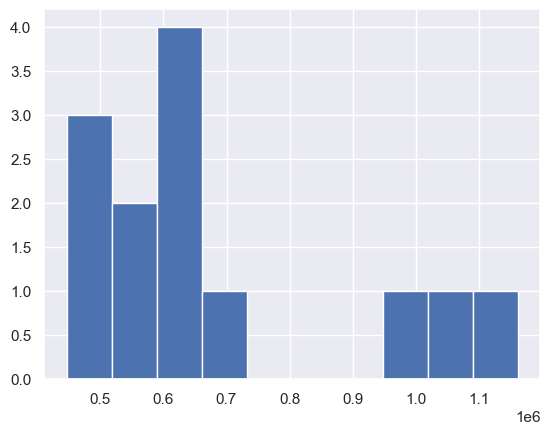

In [16]:
plt.hist(monthly_agg_df.TotalAmount)